In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as sm

A base de dados Cars contém a velocidade que um carro estava e a distância que ele percorreu após frear e parar totalmente.

In [2]:
dataset = pd.read_csv("data/cars.csv")
dataset.shape

(50, 3)

Com isso observa-se que o dataset tem 50 entradas e 3 atributos.

In [3]:
dataset.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


Com esses dados é possível fazer a previsão da velocidade que um carro estava se ele percorreu uma certa distância, para isso será usada regressão linear.

Inicialmente observa-se que existe uma coluna com os índices, indicando o índice de uma entrada, como o dataframe do pandas já possui esse índice, é possível remover essa coluna.

Para isso utiliza-se o método `drop` que passa a coluna ou linha como atributo e o eixo que será removido, se é o vertical ou horizontal.

In [4]:
dataset = dataset.drop(["Unnamed: 0"], axis=1)
dataset.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Para começar, os atributos do dataset são separados, separa-se em x e y, que são as variáveis independente e dependente respectivamente. A variável independente é aquela que vai se usar para calcular, no caso será a distância percorrida após a frenagem e a variável dependente é a velocidade que o carro estava, pois o cálculo dela, dependerá da outra variável.

In [5]:
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 0].values
print(x)

[  2  10   4  22  16  10  18  26  34  17  28  14  20  24  28  26  34  34
  46  26  36  60  80  20  26  54  32  40  32  40  50  42  56  76  84  36
  46  68  32  48  52  56  64  66  54  70  92  93 120  85]


Agora, calcula-se a correlação, que é um valor que varia de -1 a 1, quanto mais próximo de 1 ou -1, mais forte é a correlação, quanto mais próxima de 0, mais fraca é a correlação.

In [6]:
np.corrcoef(x, y)

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

Observa-se que a correlação entre as variáveis é de 0.8068949, o que indica uma correlação positiva forte, ou seja, se x aumenta, y aumenta. Por ser forte, pode ser utilizada a regressão linear para obter bons resultados.

Quando a variável x foi criada, observa-se que ela é um array de 1 dimensão. Para que a regressão linear aconteça, é necessário que a variável independente, o x, seja um array de 2 dimensões. Para isso utiliza-se o método `reshape`. O primeiro argumento indica que é para o numpy determinar o número de linhas e o segundo argumento indica que é necessário que tenha apenas 1 coluna.

Agora a regressão linear pode ser realizada. Utilizando a classe `LinearRegression` da biblioteca `sklearn`. Um objeto do tipo LinearRegression é instanciado na variável modelo. Utilizando o método `fit` passando como parâmetro as variáveis independente e dependente, o modelo de regressão linear é criado.

In [7]:
# Mudando o formato da variável x
x = x.reshape(-1, 1)

# Criando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

É possível ver a partir do modelo onde a reta de regressão linear intercepta com o eixo y e qual o coeficiente angular da reta.

In [8]:
print(f"Coeficiente Angular: {modelo.coef_}\nInterseção com eixo Y: {modelo.intercept_}")

Coeficiente Angular: [0.16556757]
Interseção com eixo Y: 8.283905641787172


Com o modelo pronto, é possível realizar algumas previsões. Para prever algum valor utilizando a reta de regressão linear, por ser uma reta, a própria equação da reta pode ser utilizada, que é Y = coeficiente * x + interserção.

Outra forma de prever os dados é utilizando `predict` que é um método da classe `LinearRegression`. Lembrando que o valor a ser previsto tem que ser passado como parâmetro em um array de duas dimensões.

Qual a velocidade do carro se ele percorreu 22 pés antes de parar?

In [9]:
equacao = 22 * modelo.coef_ + modelo.intercept_
metodo = modelo.predict([[22]])
print(f"Resultado:\nPela equação: {equacao}\nPelo método: {metodo}")

Resultado:
Pela equação: [11.92639228]
Pelo método: [11.92639228]


Observando que os dois modos chegam no mesmo resultado.

Para visualizar esse resultado, é feito um gráfico de dispersão dos dados, usando `scatterplot`. Para a linha de regressão linear, é realizado um plot, utilizando como y os valores `modelo.predict` que prevê o valor de y para cada x.

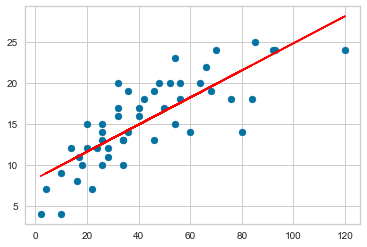

In [10]:
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color="red")

Observase que uma linha crescente, indica uma correlação positiva e os pontos dos dados estão dispersos de forma próxima a linha, o que indica uma correlação forte.

Sempre irá exisistir uma diferença entre os pontos e a linha, a linha nunca estará exatamente passando por todos os dados, senão o modelo estará com `overfitting`.

Para verificar isso, é feita a análise de resíduos utilizando a classe `ResidualsPlot` da biblioteca `yellowbrick`

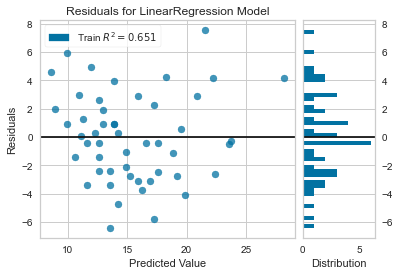

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [11]:
residuos = ResidualsPlot(modelo)
residuos.fit(x, y)
residuos.poof()

Observa-se que os resíduos estão distribuídos de forma aleatória, o que é um bom indício. E na parte da direita do gráfico que eles estão distribuídos com a forma de uma distribuição normal o que é outro indício de uma boa regressão linear.

A base de dados mt_cars, contém modelos de carros e seus respectivos consumo, cilindradas, número de cilindros entre outras caracterísiticas.

In [12]:
dataset = pd.read_csv("data/mt_cars.csv")
dataset.shape

(32, 12)

In [13]:
dataset.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Observa-se que é uma base pequena, com 32 entradas e 12 atributos. O método `head` permite analisar como essas informações estão distribuídas.

Para iniciar, será necessário exluir a coluna de modelo, pois ela não trará nenhum valor semântico para auxiliar no modelo.

In [15]:
# Remove a coluna Unnamed
dataset = dataset.drop(["Unnamed: 0"], axis = 1)

# Instancia as variáveis para calcular o modelo
x = dataset.iloc[:, 2].values  # disp é a coluna de cilindradas
y = dataset.iloc[:, 0].values  # mpg é a coluna de consumo
np.corrcoef(x,y)

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

Para iniciar irá utilizar a quantidade de cilindradas para calcular o consumo do automóvel. Depois é calculada a correlação entre as variáveis, a correlação resultante é de -0.8476 o que indica uma correlação forte e negativa, ou seja, quanto maior o número de cilindradas, menor o consumo.

Para calcular a regressão linear, primeiro é necessário, reordenar os valores de X, para um array de duas dimensões.

In [16]:
# Reorganiza os dados da variável x
x = x.reshape(-1, 1)

# Calcula o modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [18]:
print(f"Coeficiente Angular: {modelo.coef_}\nInterseção com eixo Y: {modelo.intercept_}\nScore R^2: {modelo.score(x, y)}")

Coeficiente Angular: [-0.04121512]
Interseção com eixo Y: 29.59985475616395
Score R^2: 0.7183433404897299


Depois de feita a regressão, é verificado o resultado das variáveis, o coeficiente angular da reta e onde se intercepta com o eixo Y. O score R^2 é uma métrica para dizer o quanto o modelo consegue explicar os valores previstos, que é o coeficiente de determinar.

Como exemplo é calculado o consumo para um modelo de 200 cilindradas.

In [20]:
modelo.predict([[200]])

array([21.35683076])

Uma outra forma de fazer a regressão linear é utilizando a biblioteca `statsmodels` que cria modelos baseados em datasets. Para a regressão linear é usado o método `ols` que tem como argumento a `fórmula` que parece a sintaxe do `R`. que utiliza o consumo como a variável dependente à direita e as cilindradas, como a variável independente à direita. O método `fit` gera o modelo e o método `summary` retorna um resumo do modelo e suas métricas.

In [28]:
modelo_ajustado = sm.ols(formula= "mpg ~ disp", data=dataset)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           9.38e-10
Time:                        01:39:52   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O coeficiente de determinação R^2 é de 0.718, observa-se que foi aproximadamente o mesmo valor encontrado anteriormente pela biblioteca `sklearn`. O R^2 ajustado depende do número de variáveis independentes, nesse caso esse valor é ajustado para 1 variável independente. Concluindo assim que as duas bibliotecas retonaram uma regressão linear muito próxima.

Para visualizar o modelo, utiliza-se a biblioteca `matplotlib`.

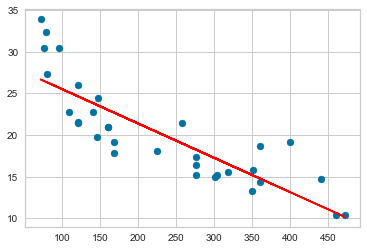

In [25]:
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color="red")

O gráfico representa o resultado e é um resultado esperando, pela correlação negativa, espera-se uma função descrescente e uma correlação forte, indica que os dados não estão muito dispersos da linha de regressão.

Para fazer a análise de uma regressão linear múltipla, é necessário passar mais de uma variável independe como parâmetro. Para isso, utilizando `sklearn`:

In [34]:
x = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0].values

Uilizando para esse modelo, as variáveis independentes, número de cilindros `cyl`, cilindradas `disp` e cavalo de potência `hp`.

Criando o modelo.

In [36]:
modelo = LinearRegression()
modelo.fit(x, y)
print(f"Coeficiente Angular: {modelo.coef_}\nInterseção com eixo Y: {modelo.intercept_}\nScore R^2: {modelo.score(x, y)}")

Coeficiente Angular: [-1.22741994 -0.01883809 -0.01467933]
Interseção com eixo Y: 34.184919167521
Score R^2: 0.7678877440928638


Agora, observa-se que para esse modelo o score R^2 foi de 0.76789 que é quse 10% melhor que o último modelo, gerando apenas com 1 variável independente.

Utilizando a biblioteca `statsmodels`:

In [39]:
modelo_ajustado = sm.ols(formula="mpg ~ cyl + disp + hp", data=dataset)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           5.05e-09
Time:                        01:50:53   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O resultado do coeficiente de determinação R^2 é muito próximo do que foi calculado antes, juntamento com a interseção com o eixo Y e os coeficientes angulares das retas.

Para caulcular a previsão, dessa vez é necessário passar 3 valores como parâmetros, pois a regressão linear foi criada utilizando 3 variáveis independentes.

In [42]:
teste = np.array([4, 200, 100])
teste = teste.reshape(1, -1)
modelo.predict(teste)

array([24.03968887])

Com esses dados é encontrado um valor maior que anteriormente, pois mais dados foram incluídos no cálculo, gerando um resultado mais preciso.